In [79]:
import seaborn as sns
import scipy as scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

%matplotlib inline 

In [80]:
df = sns.load_dataset("iris")
df=pd.DataFrame(df)
df.species.unique() #don't predict setosa, or rather its easier to predict setosa
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
print(df.shape)
print(df.columns)
print(df.dtypes)
df.describe(include="all")

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [82]:
df['setosa']=np.where(df['species']=='setosa',1,0)
df['versicolor']=np.where(df['species']=='versicolor',2,0)
df['virginica']=np.where(df['species']=='virginica',3,0)

C:\Users\LH772HBK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\LH772HBK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\LH772HBK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\LH772HBK\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


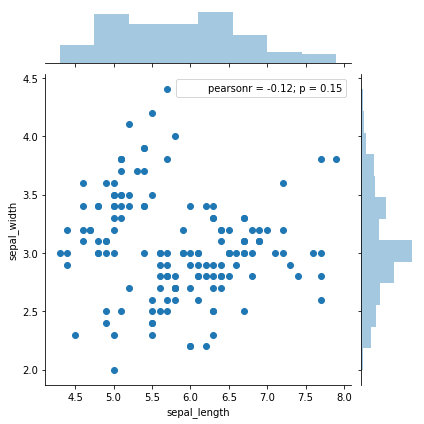

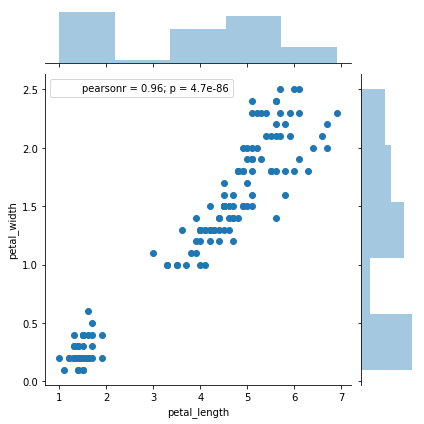

In [83]:
sns.jointplot(x=df['sepal_length'], y=df['sepal_width'], data=df) #==> non-normal
sns.jointplot(x=df['petal_length'], y=df['petal_width'], data=df) #==> linear 

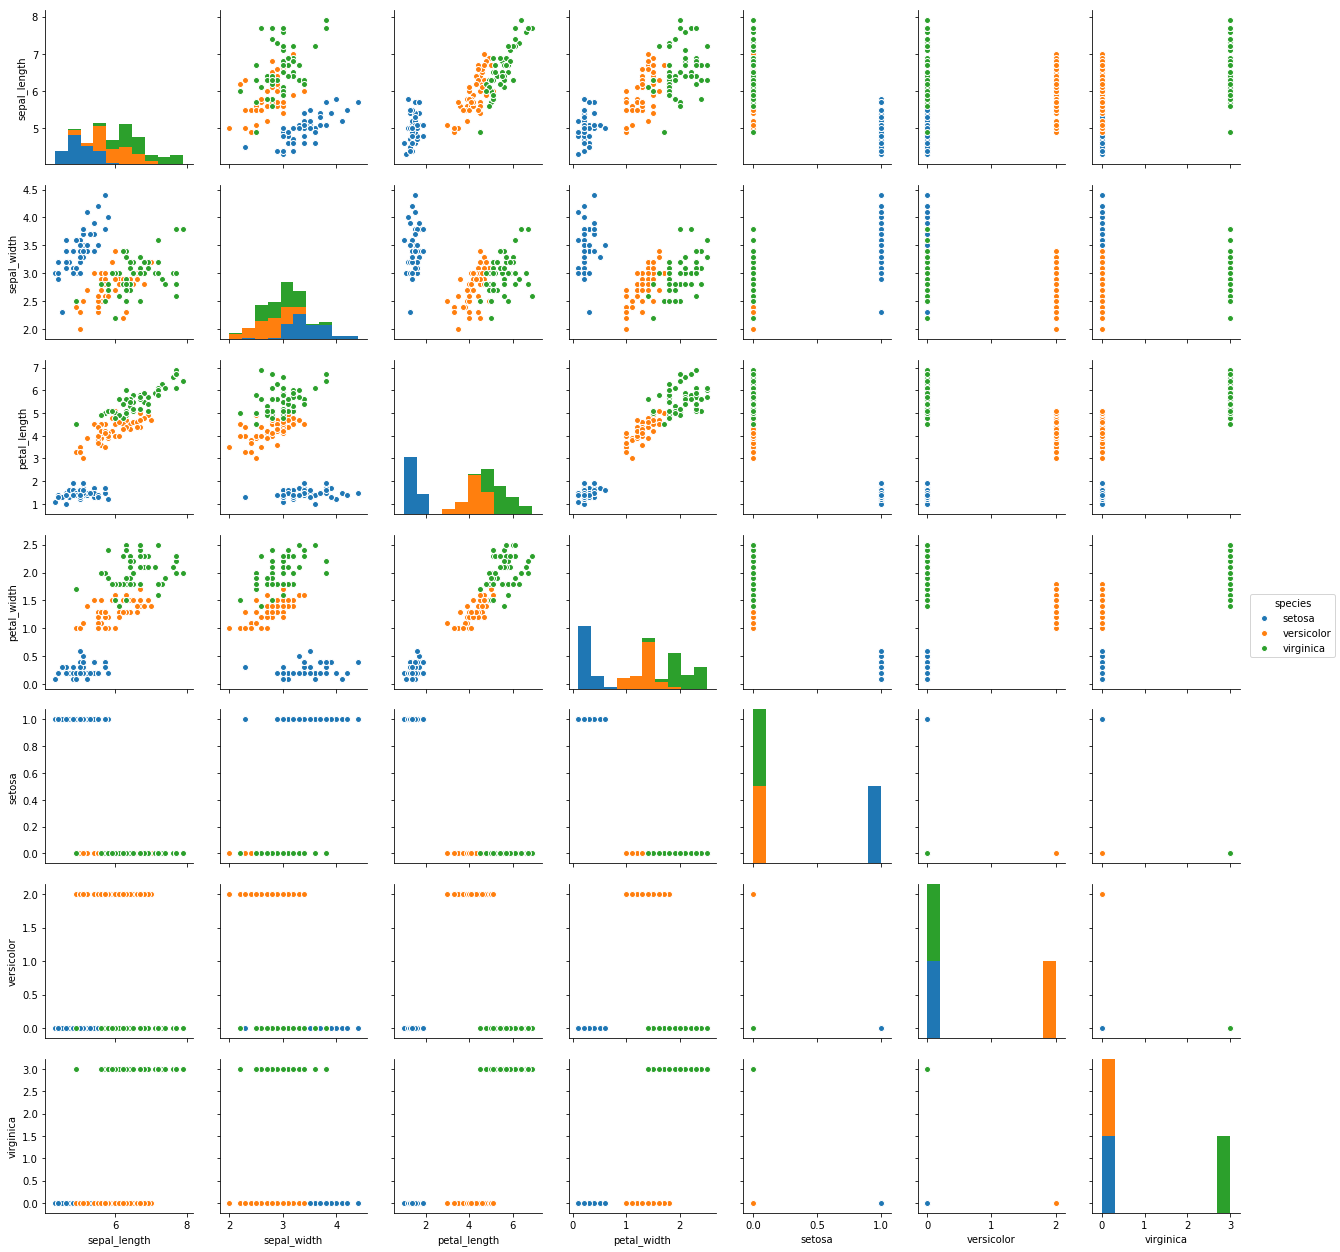

In [84]:
sns.pairplot(df, hue="species") #==> Best Relationship is Sepal Length & Petal Width

In [85]:
#preparation of dataset for testing & training.
import pandas as pd
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.svm import NuSVC

df_feat = pd.DataFrame(df, columns=df.columns[:-4])
X = df.drop('species',axis='columns')
y = df.species

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=250)


(45, 7) (45, 7)


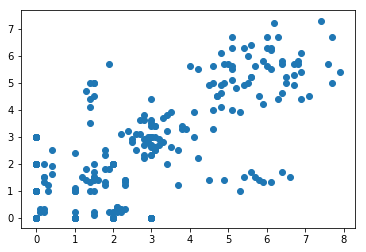

In [86]:
x = X_train[0:45]
y = X_test
print(y.shape, x.shape)

plt.scatter(x, y)
plt.show()

In [87]:
from sklearn.metrics import classification_report, confusion_matrix

LR=LogisticRegression()
LR.fit(X_train, y_train)

predictions = LR.predict(X_test)

pred1=LR.predict(X_test)
pred1.shape

print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))


[[16  0  0]
 [ 0 16  0]
 [ 0  0 13]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      1.00      1.00        16
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



In [88]:
#Import Library
from sklearn.naive_bayes import GaussianNB

NB=GaussianNB()
NB.fit(X_train, y_train)
#Predict Output
predicted= NB.predict(X_test)
predicted

print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
#https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/

[[16  0  0]
 [ 0 16  0]
 [ 0  0 13]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      1.00      1.00        16
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



In [89]:
svc = SVC()
svc.fit(X_train, y_train)

predictions = svc.predict(X_test)

pred=svc.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[16  0  0]
 [ 0 16  0]
 [ 0  0 13]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      1.00      1.00        16
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



In [90]:
from sklearn.neighbors import KNeighborsClassifier

KNC=KNeighborsClassifier()

KNC.fit(X_train, y_train)

predictKNN= KNN.predict(X_test)
predictKNN

print(confusion_matrix(y_test,predictKNN))
print(classification_report(y_test,predictKNN))
#https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/

[[16  0  0]
 [ 0 16  0]
 [ 0  0 13]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      1.00      1.00        16
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



In [91]:
from sklearn.ensemble import RandomForestClassifier 

modelrfc = RandomForestClassifier(n_estimators=100)
modelrfc

rfc=modelrfc.fit(X_train,y_train)

predrfc = rfc.predict(X_test)

print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test,predrfc))

[[16  0  0]
 [ 0 16  0]
 [ 0  0 13]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        16
 versicolor       1.00      1.00      1.00        16
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



1.0
Optimal number of features : 7


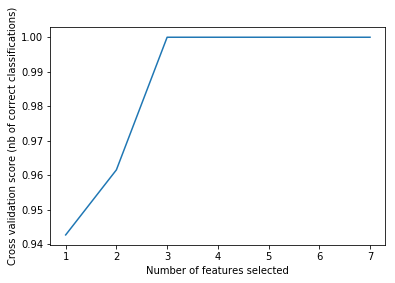

In [92]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

rfecv = RFECV( estimator = rfc , step = 1 , cv = StratifiedKFold( 2 ) , scoring = 'accuracy' )
rfecv.fit( X_train , y_train )

print (rfecv.score(X_train , y_train))
print( "Optimal number of features : %d" % rfecv.n_features_ )

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel( "Number of features selected" )
plt.ylabel( "Cross validation score (nb of correct classifications)" )
plt.plot( range( 1 , len( rfecv.grid_scores_ ) + 1 ) , rfecv.grid_scores_ )
plt.show()

In [93]:

rscore=rfc.score(X_train, y_train)
sscore=svc.score(X_train, y_train)
knnscore=KNC.score(X_train, y_train)
nbscore=NB.score(X_train, y_train)
lscore=LR.score(X_train, y_train)

print(rscore,sscore,knnscore,nbscore,lscore)

1.0 1.0 1.0 1.0 1.0


# #Working without the target column

In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(df['species'])
df['speccat'] = label_encoder.transform(df['species'])
df['speccat']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: speccat, Length: 150, dtype: int64

In [95]:
from scipy.cluster.hierarchy import dendrogram

a=df.drop(['species'], axis='columns')
distanceMatrix=a

assignments = fcluster(linkage(distanceMatrix, method='complete'), 4,'distance')


<Figure size 7200x7200 with 0 Axes>

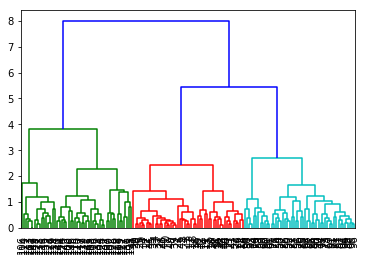

<Figure size 7200x7200 with 0 Axes>

In [96]:
dend = dendrogram(linkage(distanceMatrix, method='complete'), color_threshold=4, leaf_font_size=10)

plt.figure(figsize=(100,100))

In [97]:
cluster_output = pd.DataFrame({'cluster':assignments, 'Petal_Length':df.petal_length.tolist() , 
                               'Sepal_Length':df.sepal_length.tolist(), 'Petal_Width':df.petal_width.tolist(),
                               'Sepal_Width': df.sepal_width.tolist()})

#printing out the different cluster categories
cluster_output[cluster_output['cluster']==2]

print(cluster_output)

     cluster  Petal_Length  Sepal_Length  Petal_Width  Sepal_Width
0          2           1.4           5.1          0.2          3.5
1          2           1.4           4.9          0.2          3.0
2          2           1.3           4.7          0.2          3.2
3          2           1.5           4.6          0.2          3.1
4          2           1.4           5.0          0.2          3.6
5          2           1.7           5.4          0.4          3.9
6          2           1.4           4.6          0.3          3.4
7          2           1.5           5.0          0.2          3.4
8          2           1.4           4.4          0.2          2.9
9          2           1.5           4.9          0.1          3.1
10         2           1.5           5.4          0.2          3.7
11         2           1.6           4.8          0.2          3.4
12         2           1.4           4.8          0.1          3.0
13         2           1.1           4.3          0.1         

<function matplotlib.pyplot.show(*args, **kw)>

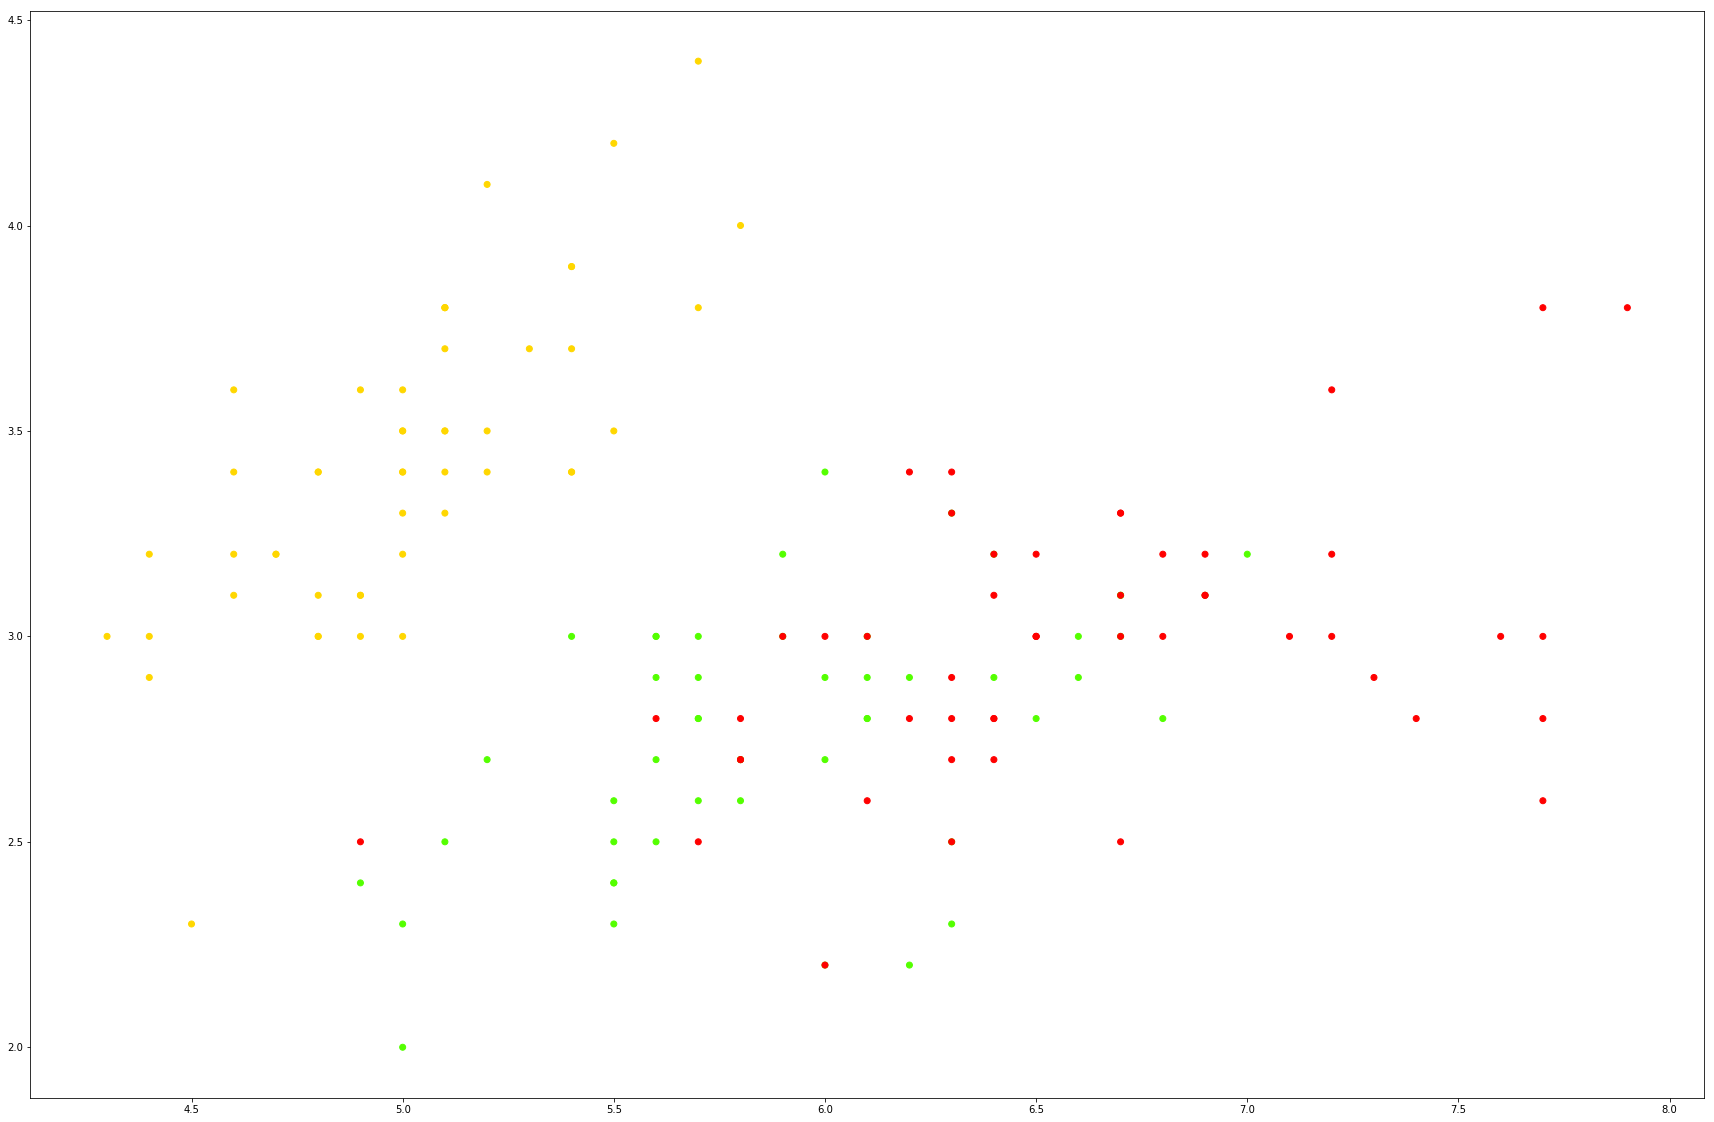

In [98]:
plt.figure(figsize=(30,20))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=assignments, cmap='prism')
plt.show